<a href="https://colab.research.google.com/github/SURIYA-po/Data-Analysis-/blob/surya/CancerDetector_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
url = "/content/drive/MyDrive/data.csv"
df = pd.read_csv(url)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()



,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Linear Regression (thresholded)": LinearRegression()
}

results = {}



for name, model in models.items():
    model.fit(X_train, y_train)

    if name == "Linear Regression (thresholded)":
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[name] = {
        "Accuracy": accuracy,
        "Jaccard": jaccard,
        "F1 Score": f1,
        "LogLoss": logloss
    }

# Show updated results
results_df = pd.DataFrame(results).T
print(results_df)


                                 Accuracy   Jaccard  F1 Score   LogLoss
KNN                              0.947368  0.869565  0.930233  0.400047
Decision Tree                    0.947368  0.869565  0.930233  1.897034
Logistic Regression              0.973684  0.931818  0.964706  0.060019
Linear Regression (thresholded)  0.956140  0.886364  0.939759  0.186681


In [ ]:
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n")
print(results_df)

Model Evaluation Results:

                                 Accuracy   Jaccard  F1 Score   LogLoss
KNN                              0.947368  0.869565  0.930233  0.400047
Decision Tree                    0.947368  0.869565  0.930233  1.897034
Logistic Regression              0.973684  0.931818  0.964706  0.060019
Linear Regression (thresholded)  0.956140  0.886364  0.939759  0.186681


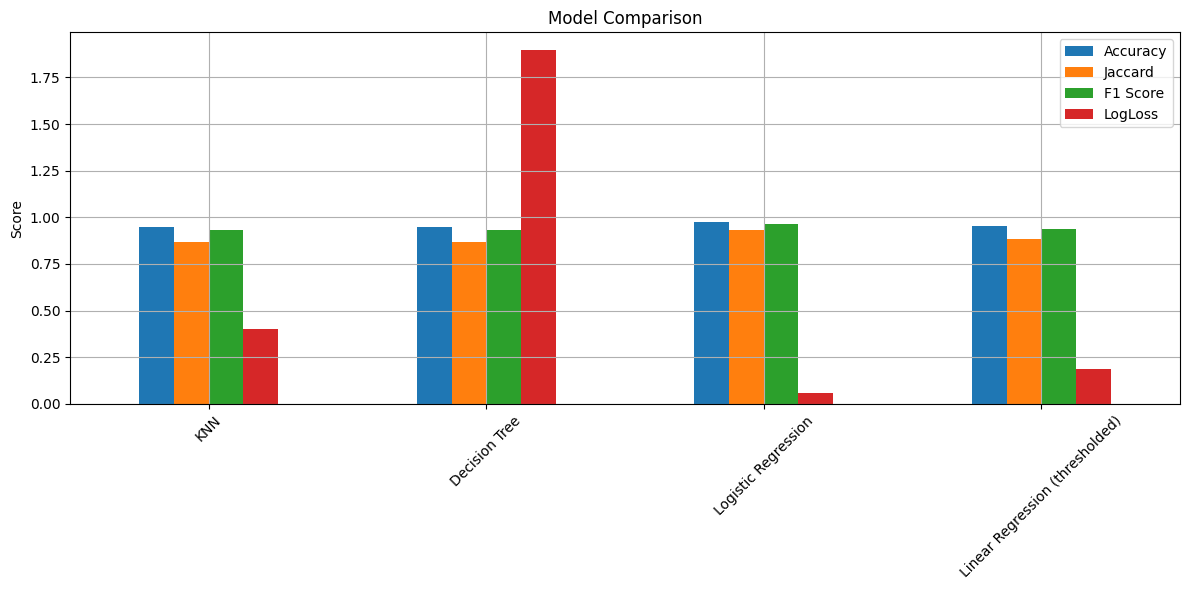

In [ ]:
import matplotlib.pyplot as plt
results_df.plot(kind='bar', figsize=(12, 6), title="Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Logistic Regression:

Highest Jaccard Index and F1 Score (best classification performance).

Lowest LogLoss (best probability prediction performance).

Most balanced and reliable overall.

Linear Regression (thresholded):

Performed well, but it’s a regression model being force-fit into classification, not ideal for interpretability or probability estimation.

KNN and Decision Tree:

Decent F1 and Jaccard, but:

Higher LogLoss, especially Decision Tree, indicating poor probabilistic prediction.

May overfit (Decision Tree especially).